# Exploratory data analysis on preprocesed SMILES dataset

Zuzanna Gorczyca, zgo@kth.se

Alga Nour Elimane, nealga@kth.se

Tse An Shih, tashih@kth.se

#### Imports

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import os

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE


### Load data

In [72]:
dir_path = os.getcwd()
train_path = os.path.join(dir_path, "datasets", "training_smiles_processed_norm_bins.csv")

train_data = pd.read_csv(train_path, index_col="INDEX")

## EDA

Find shape of data

In [73]:
train_data.shape

(202416, 131)

In training data we have 202,895 samples with 3 features.
One is index, and one is label.

Columns names

In [74]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202416 entries, 1 to 202655
Columns: 131 entries, NoAtoms to ACTIVE
dtypes: float64(125), int64(6)
memory usage: 203.8 MB


Non coulms with missing data or non-value colums.

Missing values

In [75]:
pd.DataFrame({'Null Values':train_data.isnull().sum()})


,Null Values
NoAtoms,0
CalcExactMolWt,0
fr_Al_COO,0
HeavyAtomCount,0
NumHDonors,0
...,...
MFp_120,0
MFp_121,0
MFp_122,0
MFp_123,0


Print firsts rows of dataset

In [76]:
train_data.head(5)

,NoAtoms,CalcExactMolWt,fr_Al_COO,HeavyAtomCount,NumHDonors,NumHAcceptors,MFp_0,MFp_1,MFp_2,MFp_3,...,MFp_115,MFp_116,MFp_117,MFp_118,MFp_119,MFp_120,MFp_121,MFp_122,MFp_123,ACTIVE
INDEX,,,,,,,,,,,,,,,,,,,,,
1,9,9,0,9,1,2,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2,1,2,0,1,0,1,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,9,9,0,9,0,3,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8,8,0,8,1,2,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,2,2,0,2,1,3,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


BOXPLOTS

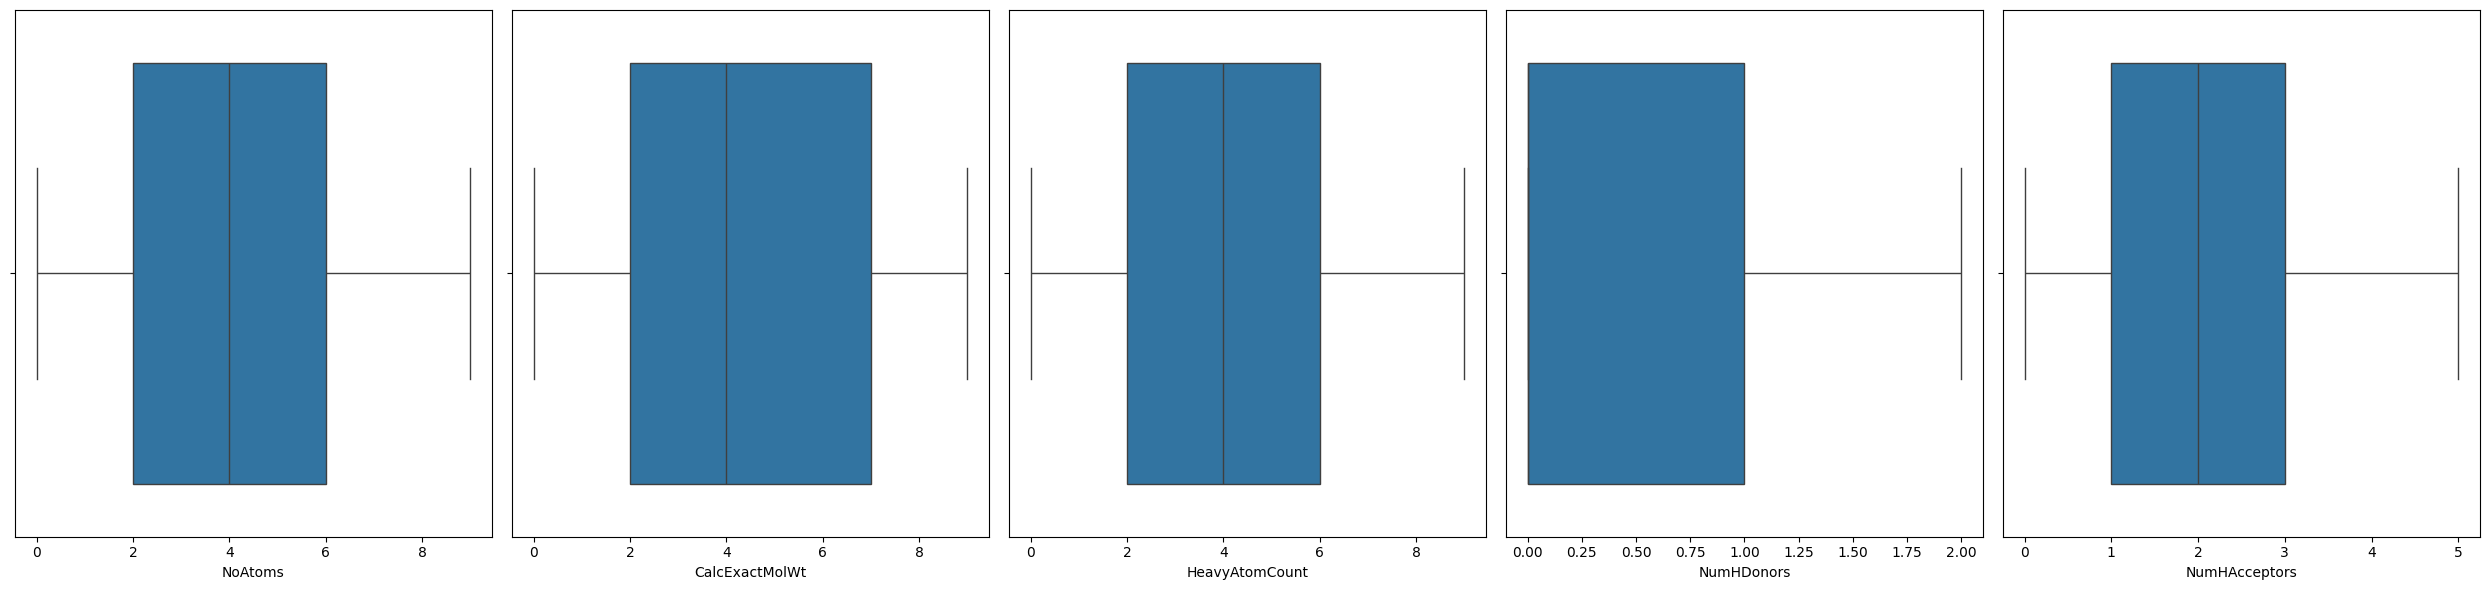

In [77]:
num_vars = ["NoAtoms", "CalcExactMolWt", "HeavyAtomCount", "NumHDonors", "NumHAcceptors"]

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(25, 6))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=train_data, ax=axs[i])

fig.tight_layout()

plt.show()

HISTOGRAMS

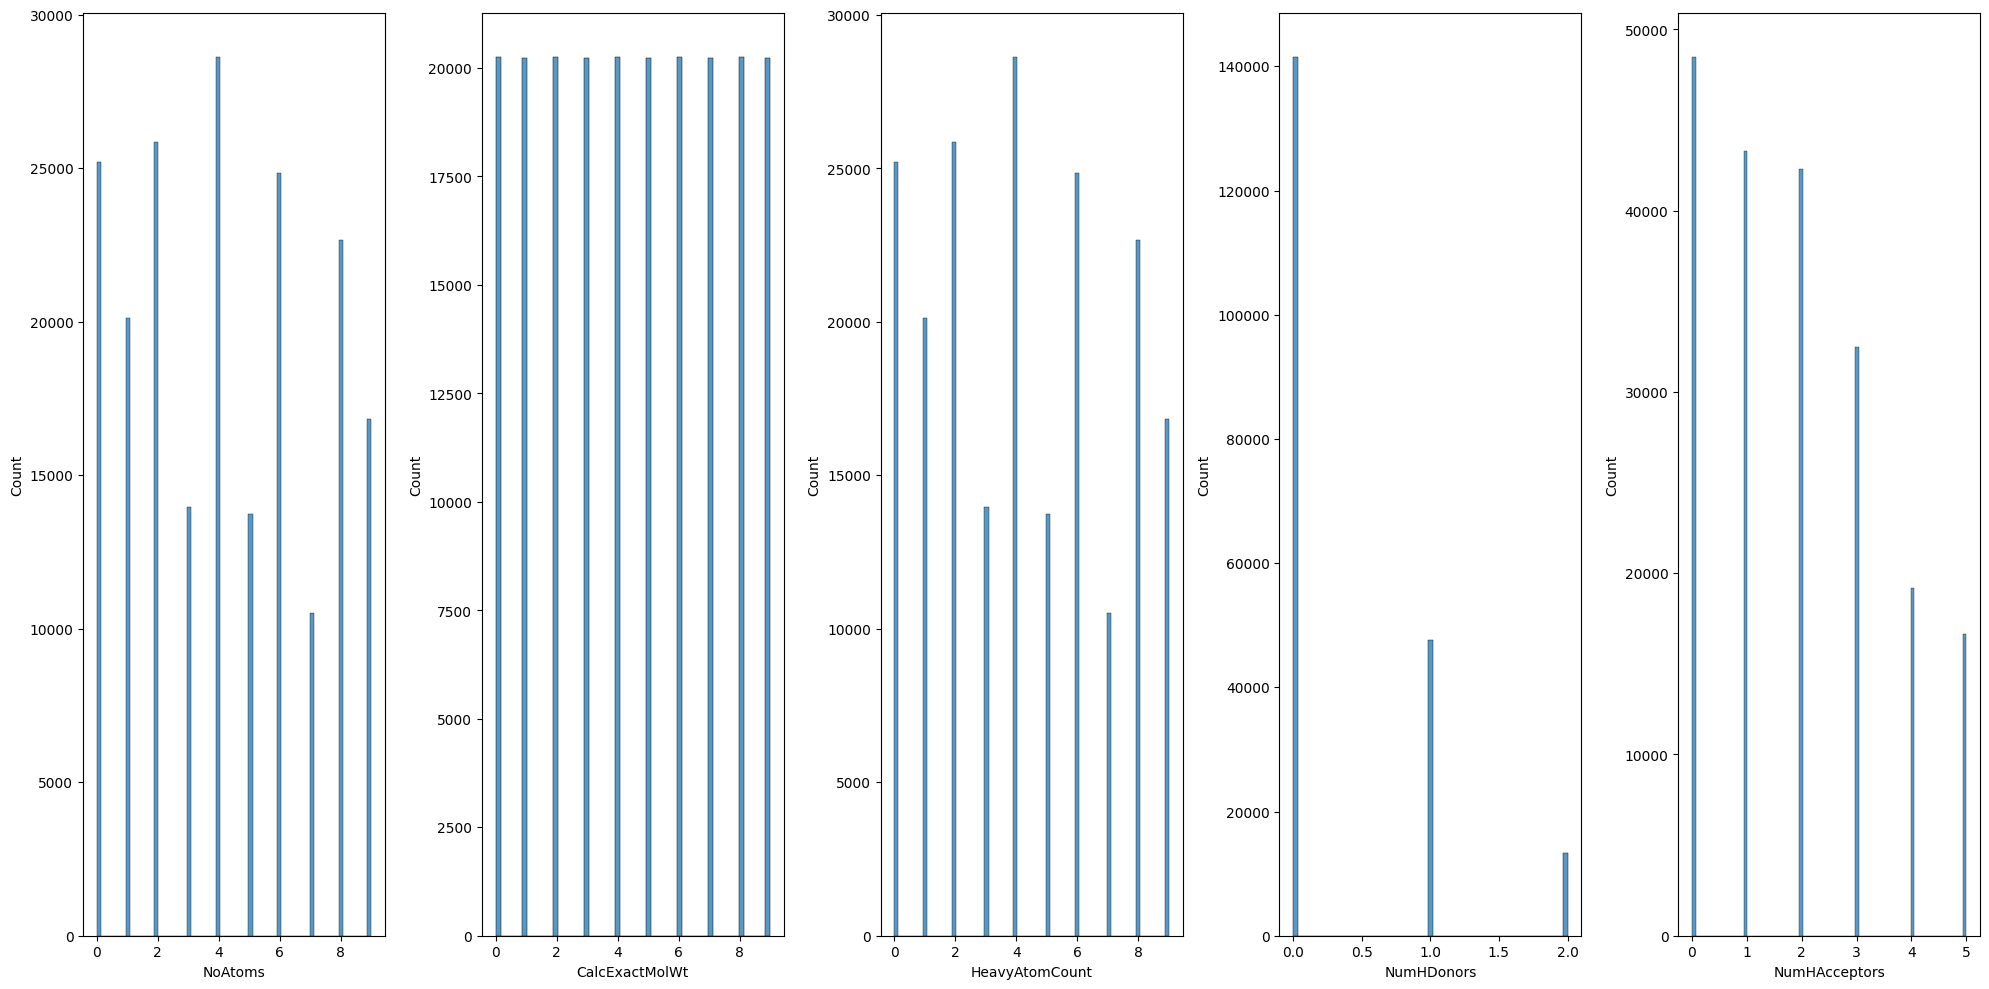

In [78]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, data=train_data, ax=axs[i])

fig.tight_layout()

plt.show()

<Axes: >

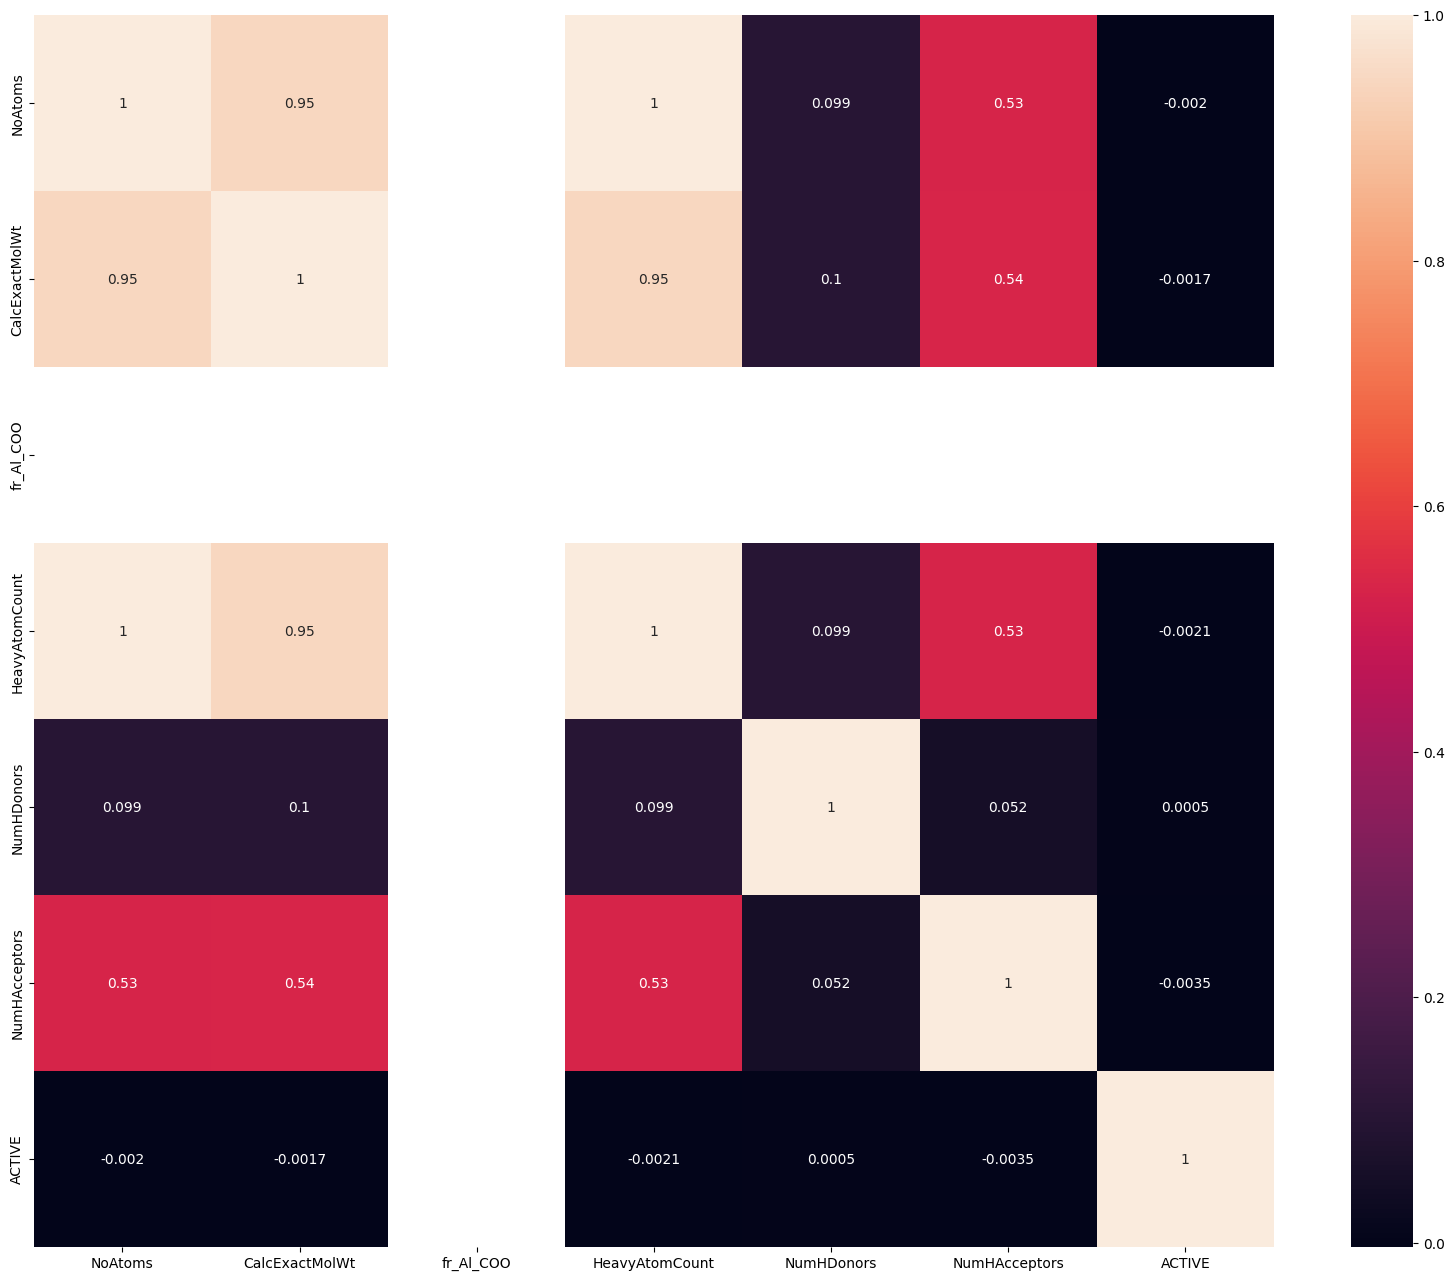

In [85]:
# Select only numeric columns for correlation
num_vars = ["NoAtoms", "CalcExactMolWt", "fr_Al_COO", "HeavyAtomCount", "NumHDonors", "NumHAcceptors", "ACTIVE"]
train_data_numeric = train_data[num_vars]

plt.figure(figsize=(20, 16))
sns.heatmap(train_data_numeric.corr(), fmt='.2g', annot=True)

Column fr_Al_COO can be dropped becouse it hase zero correlations

In [86]:
train_data.drop('fr_Al_COO',inplace=True, axis=1)


In [98]:
train_data.to_csv("./datasets/training_smiles_processed_norm_bins.csv")

In [87]:
train_data["ACTIVE"].describe()

count    202416.000000
mean          0.061714
std           0.240637
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: ACTIVE, dtype: float64

In [88]:
y_data = train_data["ACTIVE"]
x_data = train_data.drop("ACTIVE", axis=1)

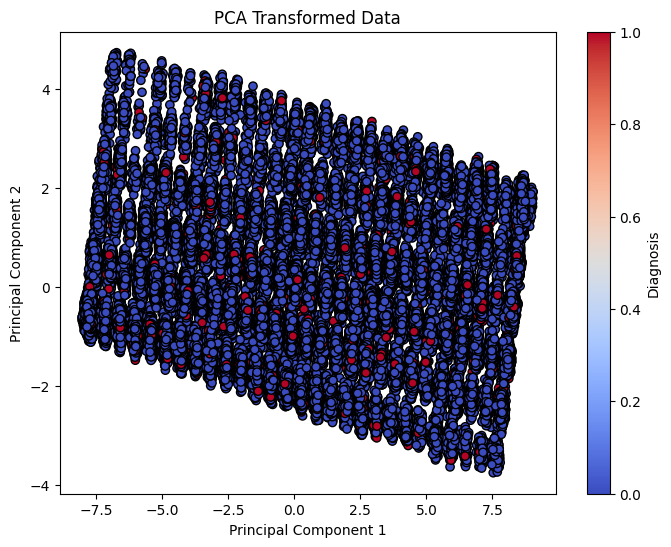

In [89]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_data)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_data, cmap='coolwarm', edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Transformed Data")
plt.colorbar(label="Diagnosis")
plt.show()

### SMOTH - dealing with imbalance data

In [90]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(x_data, y_data)
print("Size of X_data resample:", len(X_train_smote))

Size of X_data resample: 379848


In [99]:
display(X_train_smote)

,NoAtoms,CalcExactMolWt,HeavyAtomCount,NumHDonors,NumHAcceptors,MFp_0,MFp_1,MFp_2,MFp_3,MFp_4,...,MFp_114,MFp_115,MFp_116,MFp_117,MFp_118,MFp_119,MFp_120,MFp_121,MFp_122,MFp_123
0,9,9,9,1,2,0.000000,1.0,0.000000,1.000000,0.000000,...,0.0,0.0,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0
1,1,2,1,0,1,1.000000,1.0,0.000000,1.000000,0.000000,...,0.0,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.0
2,9,9,9,0,3,0.000000,0.0,1.000000,1.000000,0.000000,...,0.0,1.0,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.0
3,8,8,8,1,2,0.000000,0.0,0.000000,1.000000,0.000000,...,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
4,2,2,2,1,3,0.000000,0.0,0.000000,1.000000,0.000000,...,0.0,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379843,7,7,7,0,2,0.409205,1.0,1.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.409205,0.590795,0.000000,1.000000,0.0
379844,3,2,3,0,0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.771211,1.000000,0.000000,0.000000,1.000000,0.0
379845,2,3,2,0,0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.330796,1.000000,0.0
379846,1,2,1,0,1,0.000000,0.0,0.510632,0.510632,0.510632,...,0.0,1.0,0.489368,0.510632,0.000000,0.000000,0.000000,0.000000,1.000000,0.0


In [93]:
y_train_smote.describe()

count    379848.000000
mean          0.500000
std           0.500001
min           0.000000
25%           0.000000
50%           0.500000
75%           1.000000
max           1.000000
Name: ACTIVE, dtype: float64

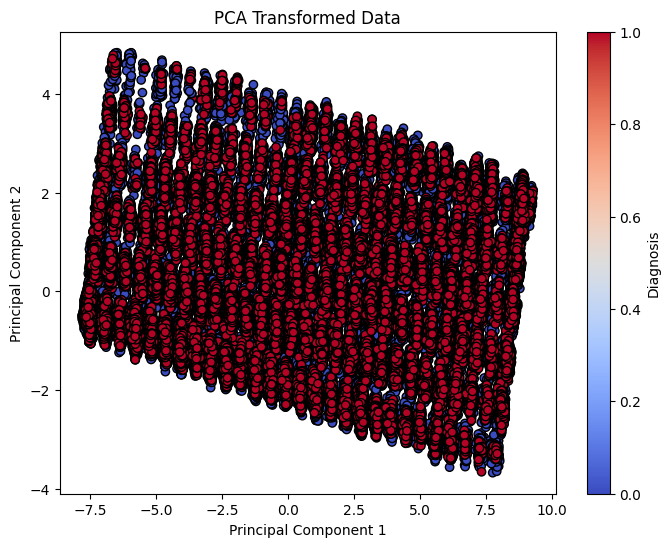

In [97]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_smote)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_smote, cmap='coolwarm', edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Transformed Data")
plt.colorbar(label="Diagnosis")
plt.show()

In [107]:
# X_train_smote.insert(0, "ACTIVE", y_train_smote)
X_train_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379848 entries, 0 to 379847
Columns: 130 entries, ACTIVE to MFp_123
dtypes: float64(125), int64(5)
memory usage: 376.7 MB


In [104]:
X_train_smote.to_csv("./datasets/training_smiles_processed_smoth.csv")